# Adapted directly from Dario Radecic's Time Series Tutorials* 

In [1]:
# Adapted from Dario Radecic's "Time Series from Scratch" lessons
# Import datetime libraries
from datetime import datetime, timedelta

In [2]:
# Display different date and time formats
print("Arbitrary date:", end = " ")
print(datetime(year = 2022, month = 5, day = 15))

# Display specified date and time
print("Specified date and time:", end = " ")
print(datetime(year = 2022, month = 5, day = 15, hour = 7, minute = 23, second = 44))

# Display current date and time
print("Present date and time:", end = " ")
print(datetime.now())

# Display yesterday's date and time
print("Yesterday's date and time:", end = " ")
print(datetime.now() - timedelta(days = 1))

Arbitrary date: 2022-05-15 00:00:00
Specified date and time: 2022-05-15 07:23:44
Present date and time: 2022-08-18 17:05:35.669910
Yesterday's date and time: 2022-08-17 17:05:35.669910


In [3]:
# Parsing datetime objects
now = datetime.now()
print("Current Month:", now.month) # Can use .year, .month, .day, etc.

Current Month: 8


In [4]:
# Import pandas
import pandas as pd

# Create datetime list with pandas
date_list = pd.date_range(start = '2022-07-21', end = '2022-09-21')
print(date_list)

# Create datetime list from starting point and intervals
date_list = pd.date_range(start = '2022-07-21', periods = 10, freq = 'D')
print(date_list)

# Print min and max dates in date list
print(f'Minimum date: {date_list.min()}')
print(f'Maximum date: {date_list.max()}')

DatetimeIndex(['2022-07-21', '2022-07-22', '2022-07-23', '2022-07-24',
               '2022-07-25', '2022-07-26', '2022-07-27', '2022-07-28',
               '2022-07-29', '2022-07-30', '2022-07-31', '2022-08-01',
               '2022-08-02', '2022-08-03', '2022-08-04', '2022-08-05',
               '2022-08-06', '2022-08-07', '2022-08-08', '2022-08-09',
               '2022-08-10', '2022-08-11', '2022-08-12', '2022-08-13',
               '2022-08-14', '2022-08-15', '2022-08-16', '2022-08-17',
               '2022-08-18', '2022-08-19', '2022-08-20', '2022-08-21',
               '2022-08-22', '2022-08-23', '2022-08-24', '2022-08-25',
               '2022-08-26', '2022-08-27', '2022-08-28', '2022-08-29',
               '2022-08-30', '2022-08-31', '2022-09-01', '2022-09-02',
               '2022-09-03', '2022-09-04', '2022-09-05', '2022-09-06',
               '2022-09-07', '2022-09-08', '2022-09-09', '2022-09-10',
               '2022-09-11', '2022-09-12', '2022-09-13', '2022-09-14',
      

In [5]:
# Working with the MBB historical price data set
df = pd.read_csv('MBB.csv', index_col = 'Date', parse_dates = True)
print(df.head(5))

                  Open        High         Low       Close  Adj Close  Volume
Date                                                                         
2007-03-16  100.849998  100.860001  100.849998  100.860001  65.666855     200
2007-03-19  100.860001  100.860001  100.860001  100.860001  65.666855       0
2007-03-20  100.980003  100.980003  100.980003  100.980003  65.745049     100
2007-03-21  100.970001  101.129997  100.970001  101.110001  65.829659   10600
2007-03-22  101.070000  101.070000  100.970001  100.970001  65.738487     800


In [6]:
# Resampling: Allows you to change the aggregation level of the time series.
# For example, changing data from daily to yearly intervals.

yearly_totals = df.resample(rule = 'Y').sum()
print(yearly_totals.head(5))

                    Open          High           Low         Close  \
Date                                                                 
2007-12-31  20143.110006  20166.809994  20122.250038  20148.000030   
2008-12-31  25831.009974  25931.159934  25744.619966  25831.120019   
2009-12-31  26697.910046  26736.789930  26639.119943  26688.760032   
2010-12-31  27262.100038  27292.070035  27227.830065  27259.890018   
2011-12-31  26909.360029  26942.210006  26873.610019  26908.850054   

               Adj Close    Volume  
Date                                
2007-12-31  13361.230279   2769300  
2008-12-31  17862.781776  22602100  
2009-12-31  19198.653738  33957600  
2010-12-31  20383.524638  35359900  
2011-12-31  21273.594790  60580400  


In [7]:
# Another example: Resampling to be quarterly averages

In [8]:
quarterly_average = df.resample(rule = 'Q').mean()
print(quarterly_average.head(5))

                  Open        High         Low       Close  Adj Close  \
Date                                                                    
2007-03-31  100.928183  100.969091  100.904546  100.933637  65.714838   
2007-06-30  100.006032  100.062857   99.901746   99.980159  65.540173   
2007-09-30   99.481587   99.603016   99.383969   99.514286  66.063539   
2007-12-31  101.018437  101.206250  100.895313  101.087188  67.927082   
2008-03-31  102.639016  102.866065  102.381967  102.640983  69.748060   

                  Volume  
Date                      
2007-03-31   2972.727273  
2007-06-30   7015.873016  
2007-09-30  16533.333333  
2007-12-31  19578.125000  
2008-03-31  80972.131148  


In [9]:
# Shifting: Allows you to shift the series up or down by a number of periods
df_shift = df.copy()
df_shift['Shift_1'] = df_shift['Adj Close'].shift(1)
df_shift['Shift_2'] = df_shift['Adj Close'].shift(2)

print(df_shift.head(5))


                  Open        High         Low       Close  Adj Close  Volume  \
Date                                                                            
2007-03-16  100.849998  100.860001  100.849998  100.860001  65.666855     200   
2007-03-19  100.860001  100.860001  100.860001  100.860001  65.666855       0   
2007-03-20  100.980003  100.980003  100.980003  100.980003  65.745049     100   
2007-03-21  100.970001  101.129997  100.970001  101.110001  65.829659   10600   
2007-03-22  101.070000  101.070000  100.970001  100.970001  65.738487     800   

              Shift_1    Shift_2  
Date                              
2007-03-16        NaN        NaN  
2007-03-19  65.666855        NaN  
2007-03-20  65.666855  65.666855  
2007-03-21  65.745049  65.666855  
2007-03-22  65.829659  65.745049  


In [10]:
# Shift backwards:
df_shift['Shift_-1'] = df_shift['Adj Close'].shift(-1)
df_shift['Shift_-2'] = df_shift['Adj Close'].shift(-2)
print(df_shift.head(5))
print(df_shift.tail(5))

                  Open        High         Low       Close  Adj Close  Volume  \
Date                                                                            
2007-03-16  100.849998  100.860001  100.849998  100.860001  65.666855     200   
2007-03-19  100.860001  100.860001  100.860001  100.860001  65.666855       0   
2007-03-20  100.980003  100.980003  100.980003  100.980003  65.745049     100   
2007-03-21  100.970001  101.129997  100.970001  101.110001  65.829659   10600   
2007-03-22  101.070000  101.070000  100.970001  100.970001  65.738487     800   

              Shift_1    Shift_2   Shift_-1   Shift_-2  
Date                                                    
2007-03-16        NaN        NaN  65.666855  65.745049  
2007-03-19  65.666855        NaN  65.745049  65.829659  
2007-03-20  65.666855  65.666855  65.829659  65.738487  
2007-03-21  65.745049  65.666855  65.738487  65.745049  
2007-03-22  65.829659  65.745049  65.745049  65.751526  
                 Open       High 

In [11]:
# Documentation: help(pandas.core.window.rolling)
df_shift['Quarterly_MA'] = df_shift['Adj Close'].rolling(3, win_type= None).mean()
df_shift['Annual_MA'] = df_shift['Adj Close'].rolling(12, win_type= None).mean()
print(df_shift.head(13))

                  Open        High         Low       Close  Adj Close  Volume  \
Date                                                                            
2007-03-16  100.849998  100.860001  100.849998  100.860001  65.666855     200   
2007-03-19  100.860001  100.860001  100.860001  100.860001  65.666855       0   
2007-03-20  100.980003  100.980003  100.980003  100.980003  65.745049     100   
2007-03-21  100.970001  101.129997  100.970001  101.110001  65.829659   10600   
2007-03-22  101.070000  101.070000  100.970001  100.970001  65.738487     800   
2007-03-23  100.830002  101.059998  100.830002  100.980003  65.745049    1700   
2007-03-26  100.980003  101.000000  100.980003  100.989998  65.751526    5300   
2007-03-27  101.000000  101.000000  100.930000  100.940002  65.719017    1300   
2007-03-28  101.000000  101.000000  100.930000  100.930000  65.712448    4200   
2007-03-29  100.800003  100.800003  100.800003  100.800003  65.627846    1600   
2007-03-30  100.870003  100.

In [12]:
# Differencing: Differencing is used to make a time series stationary (meaning it has constant mean, variance and covariance)
df_diff = df.copy()
df_diff['Adj_Close_Diff_1'] = df_diff['Adj Close'].diff(periods = 1)
df_diff['Adj_Close_Diff_2'] = df_diff['Adj Close'].diff(periods = 2)
print(df_diff.head(5))

                  Open        High         Low       Close  Adj Close  Volume  \
Date                                                                            
2007-03-16  100.849998  100.860001  100.849998  100.860001  65.666855     200   
2007-03-19  100.860001  100.860001  100.860001  100.860001  65.666855       0   
2007-03-20  100.980003  100.980003  100.980003  100.980003  65.745049     100   
2007-03-21  100.970001  101.129997  100.970001  101.110001  65.829659   10600   
2007-03-22  101.070000  101.070000  100.970001  100.970001  65.738487     800   

            Adj_Close_Diff_1  Adj_Close_Diff_2  
Date                                            
2007-03-16               NaN               NaN  
2007-03-19          0.000000               NaN  
2007-03-20          0.078194          0.078194  
2007-03-21          0.084610          0.162804  
2007-03-22         -0.091172         -0.006562  


In [ ]:
help('pandas.plotting')

In [18]:
df_plot = df.copy()
df_plot = df_plot.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
print(df_plot.head())

            Adj Close
Date                 
2007-03-16  65.666855
2007-03-19  65.666855
2007-03-20  65.745049
2007-03-21  65.829659
2007-03-22  65.738487


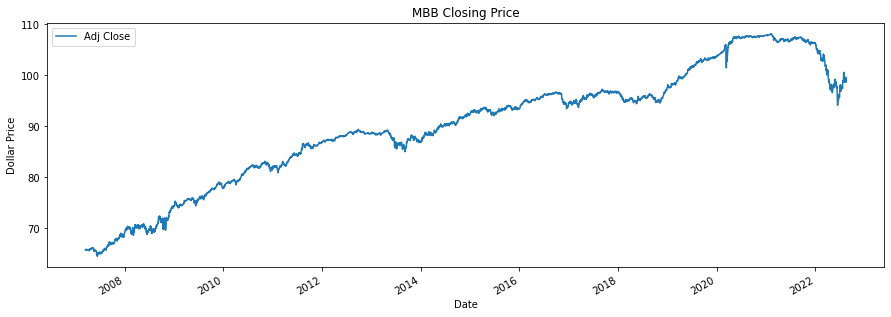

In [19]:
# Basic plot of time series in pandas
df_plot.plot.line(title = "MBB Adj Closing Price", figsize = (15,5), ylabel = 'Dollar Price');

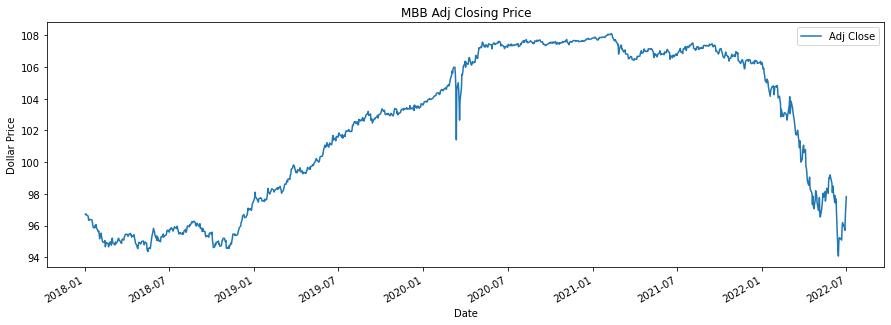

In [20]:
# Plotting a subset of the time series from 2018 to 2022
df_plot['2018-01-01':'2022-07-01'].plot.line(title = "MBB Adj Closing Price", figsize = (15,5), ylabel = 'Dollar Price');

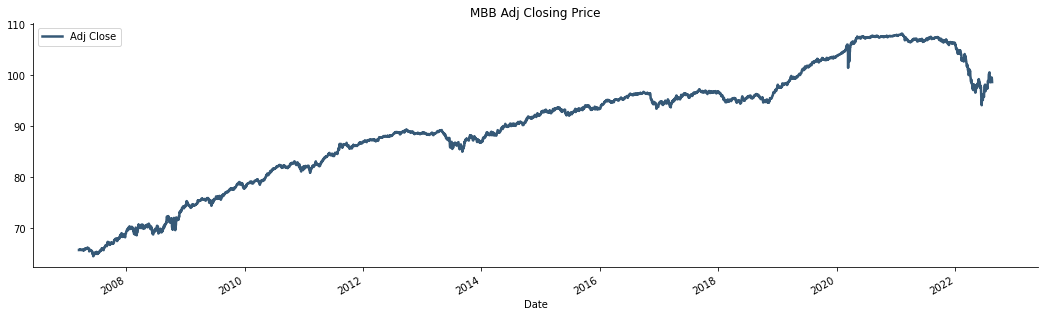

In [22]:
# Matplotlib graph of the same data:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

df_plot.plot(figsize=(18, 5), title='MBB Adj Closing Price');

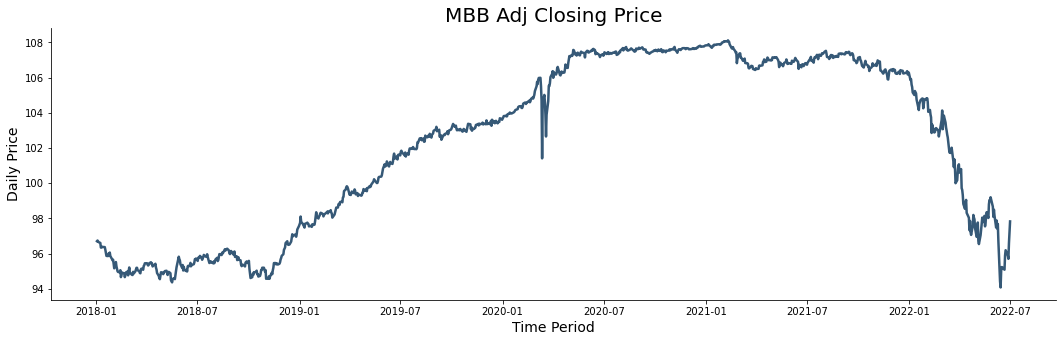

In [23]:
plt.title('MBB Adj Closing Price', size=20)
plt.xlabel('Time Period', size=14)
plt.ylabel('Daily Price', size=14)

plt.plot(df['Adj Close']['2018-01-01':'2022-07-01']);

# White Noise Analysis

In [24]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

### Create a white noise time series

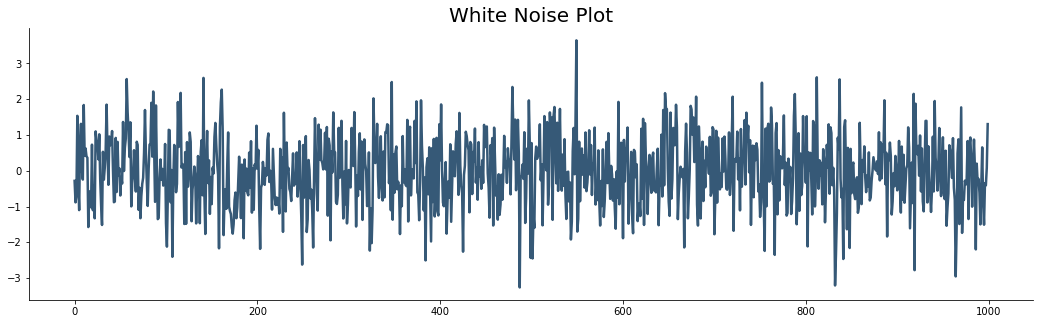

In [25]:
white_noise = np.random.randn(1000)

# Plot the white noise series
plt.title('White Noise Plot', size = 20)
plt.plot(np.arange(len(white_noise)), white_noise);

### Split the series into intervals and check the intervals mean and standard deviation 

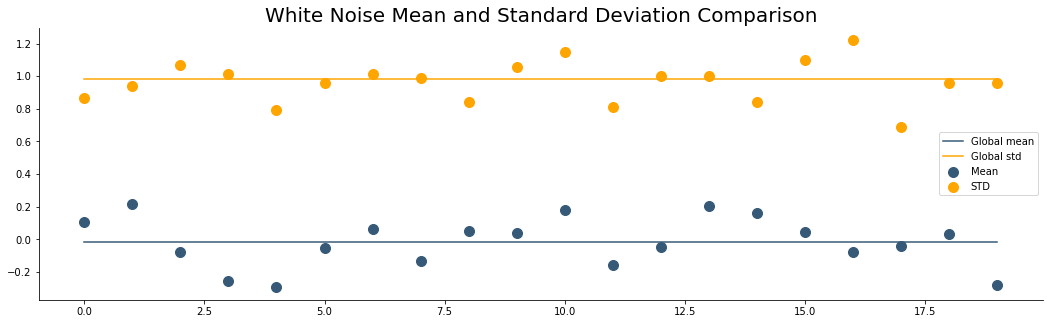

In [26]:
white_noise_intervals = np.split(white_noise, 20)
means = []
stds = []

# Calculate the mean and std of each interval
for interval in white_noise_intervals:
    means.append(np.mean(interval))
    stds.append(np.std(interval))

# Plot the std and mean to check for constant results
plt.title('White Noise Mean and Standard Deviation Comparison', size=20)
plt.plot(np.arange(len(means)), [white_noise.mean()] * len(means), label='Global mean', lw=1.5)
plt.scatter(x=np.arange(len(means)), y=means, label='Mean', s=100)
plt.plot(np.arange(len(stds)), [white_noise.std()] * len(stds), label='Global std', lw=1.5, color='orange')
plt.scatter(x=np.arange(len(stds)), y=stds, label='STD', color='orange', s=100)
plt.legend();

### Autocorrelation Plot: Autocorrelation plots also include a shaded area that represents confidence intervals. Anything inside the shaded area means that the correlation at that point isn’t statistically significant.

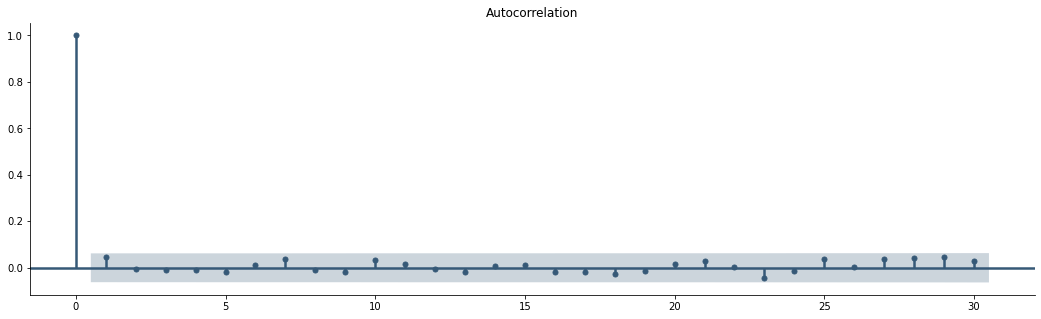

In [27]:
plot_acf(np.array(white_noise));

# Random Walk Analysis

### Create a random walk time series 

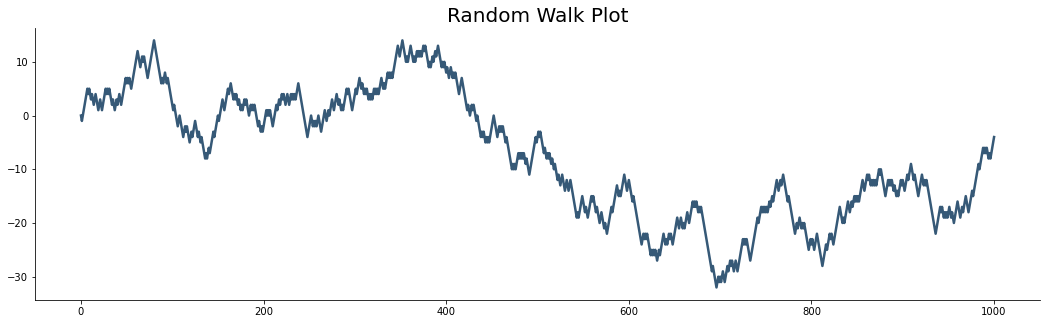

In [28]:
# Start the random walk with a seed number (chose 0).
# Then iterate each element of the set with either a 1 or a -1 randomly

random_walk = [0]

for i in range(0,1000):
    # Movement direction (+1/-1) based on a random number
    num = -1 if np.random.random() < 0.5 else 1
    random_walk.append(random_walk[-1] + num)

# Plot
plt.title("Random Walk Plot", size = 20)
plt.plot(np.arange(len(random_walk)),random_walk);

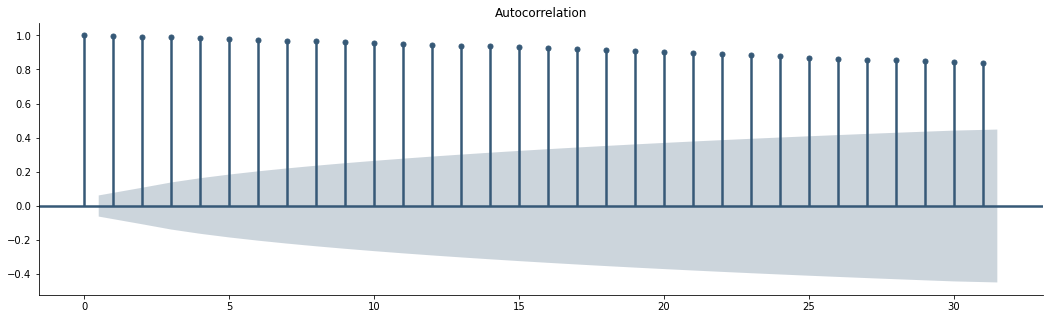

In [29]:
plot_acf(np.array(random_walk));

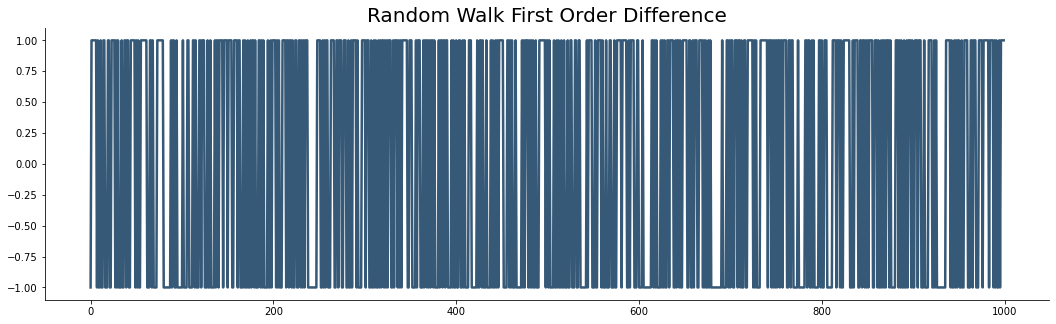

In [30]:
# First-order differencing test
s_random_walk = pd.Series(random_walk)
s_random_walk_diff = s_random_walk.diff().dropna()

# Plot
plt.title('Random Walk First Order Difference', size=20)
plt.plot(np.arange(len(s_random_walk_diff)), s_random_walk_diff);

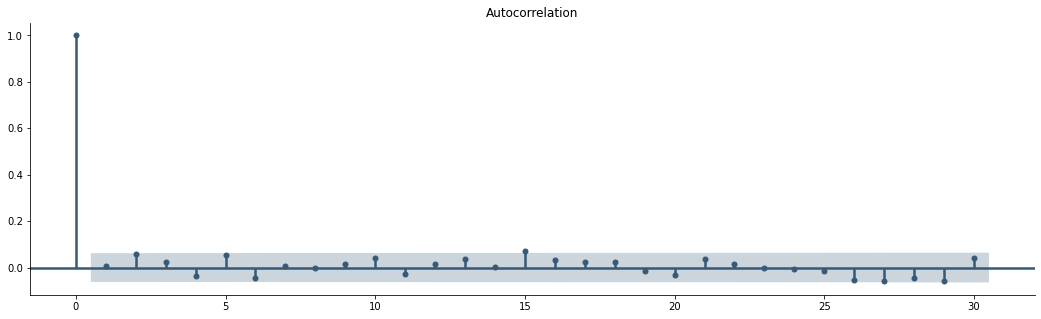

In [31]:
# Checking autocorrelation of the random walk first order difference
plot_acf(np.array(s_random_walk_diff));

# Based on the autocorrelation plot, no forecastable patterns found in the random walk series

# Time Series Decomposition

### 3 Types: 

#### - Trend: General movement over time
#### - Seasonal: Behaviors captured in individual season periods
#### - Residual: Everything not captured by trend and seasonal components

In [32]:
# Matplotlib plot parameters
rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

## Additive Trend and Additive Seasonality

### The following code snippet creates a dummy 10-year-long monthly-sampled time series that simulates additive trend and seasonality

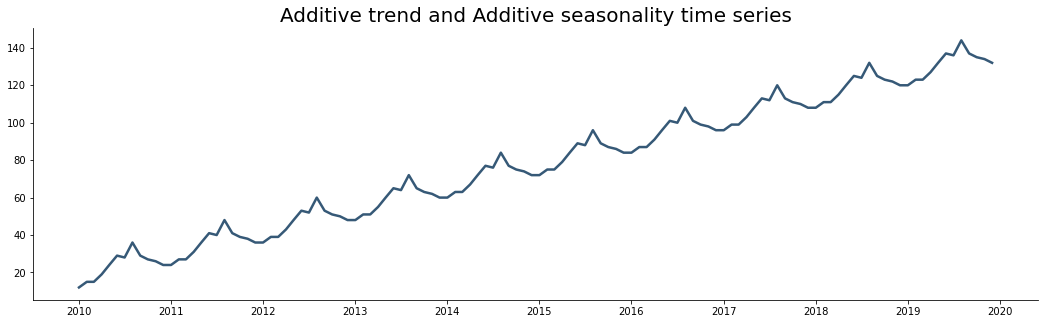

In [33]:
# Terms to be added to single season for seasonality effect
seasonal_adders = [11, 13, 12, 15, 19, 23, 21, 28, 20, 17, 15, 12]
# Immitate 10 years of data
x_range = np.arange(1, 121)

time_series = []
# Split the time series into 10 year-long chunks
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # Add value to seasonal scalar
        time_series.append(val + seasonal_adders[i])
        
# Convert to Dataframe
df_aa = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Additive trend and Additive seasonality time series', size=20)
plt.plot(df_aa);

## Additive Trend and Multiplicative Seasonality

   ### The following code snippet creates a dummy 10-year-long monthly-sampled time series that simulates additive trend and multiplicative seasonality



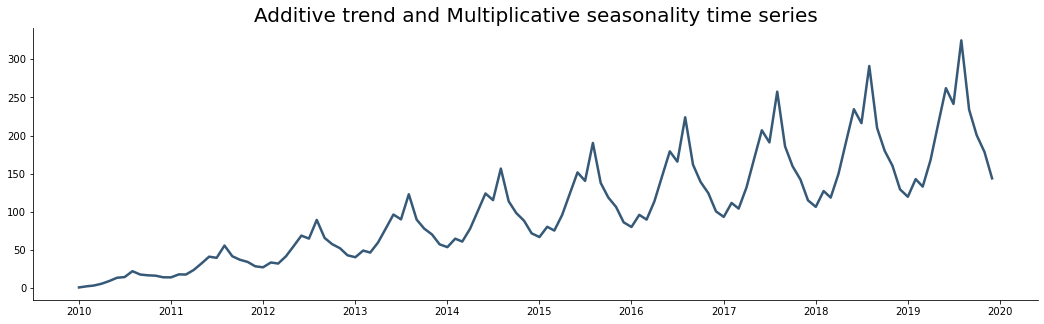

In [36]:
# Single season multiplier factors - for seasonality effect
seasonal_multipliers = [1.1, 1.3, 1.2, 1.5, 1.9, 2.3, 2.1, 2.8, 2.0, 1.7, 1.5, 1.2]
# Immitate 10 years of data
xs = np.arange(1, 121)

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(xs, 10):
    for i, val in enumerate(chunk):
        # Multiply value with seasonal scalar
        time_series.append(val * seasonal_multipliers[i])
        
# Convert to DataFrame
df_am = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Additive trend and Multiplicative seasonality time series', size=20)
plt.plot(df_am);

## Multiplicative Trend and Additive Seasonality

### The following code snippet creates a dummy 10-year-long monthly-sampled time series that simulates multiplicative trend and additive seasonality

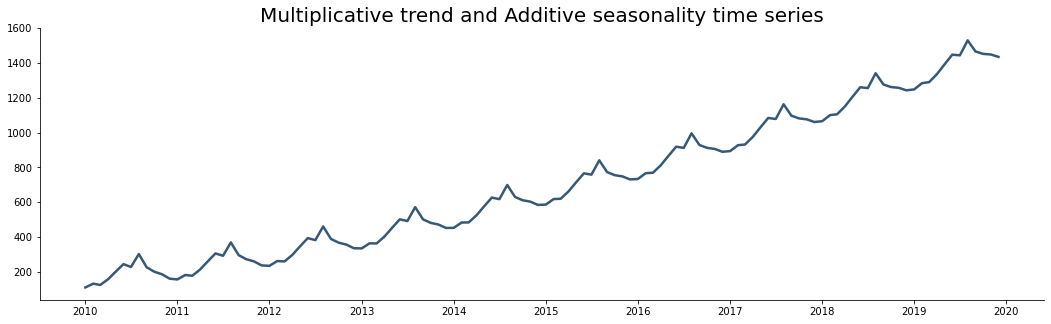

In [38]:

# Terms to be added to single season for seasonality effect
seasonal_adders = [110, 130, 120, 150, 190, 230, 210, 280, 200, 170, 150, 120]
# Immitate 10 years of data
x_range = np.arange(1, 121)
# Raise to the 1.5 power to get upwards "curved" trend
x_range = np.array([x**1.5 for x in xs])

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # Add value to seasonal scalar
        time_series.append(val + seasonal_adders[i])

# Convert to DataFrame
df_ma = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Multiplicative trend and Additive seasonality time series', size=20)
plt.plot(df_ma);

## Multiplicative Trend and Multiplicative Seasonality

### The following code snippet creates a dummy 10-year-long monthly-sampled time series that simulates multiplicative trend and multiplicative seasonality

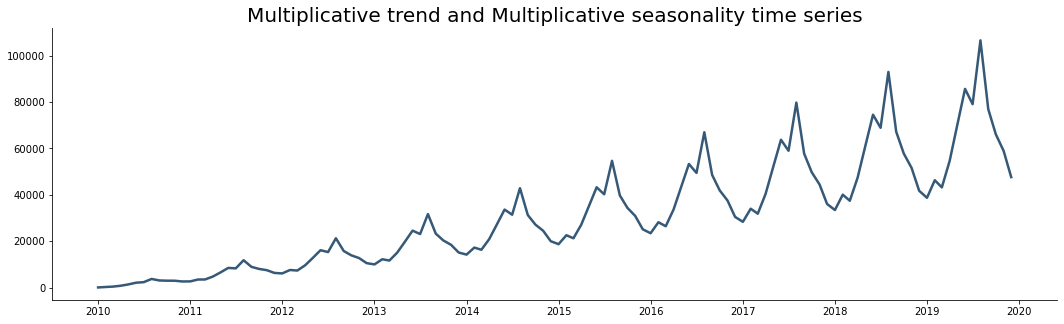

In [43]:
# Single season multiplier factors - for seasonality effect
seasonal_multipliers = [110, 130, 120, 150, 190, 230, 210, 280, 200, 170, 150, 120]
# Immitate 10 years of data
x_range = np.arange(1, 121)
# Raise to the 1.25 power to get upwards "curved" trend
x_range = np.array([x**1.25 for x in xs])

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # Multiply value with seasonal scalar
        time_series.append(val * seasonal_multipliers[i])
        
# Convert to DataFrame
df_mm = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Multiplicative trend and Multiplicative seasonality time series', size=20)
plt.plot(df_mm);